# ✈️ Airline Customer Satisfaction Prediction
## Using Decision Tree Classification

**Type:** Supervised Machine Learning  
**Problem:** Binary Classification  

This project predicts whether an airline customer is satisfied or not based on
demographic information, travel details, and service quality ratings.


## 📌 Problem Statement

Customer satisfaction is a key performance indicator in the airline industry.
The objective of this project is to build a machine learning model that can
predict customer satisfaction using historical airline passenger data.

The model will help airlines understand which factors most influence
customer satisfaction.


## 🧠 Machine Learning Approach

- Learning Type: Supervised Learning  
- Algorithm Used: Decision Tree Classifier  
- Target Variable: Satisfaction  
- Output:
  - 1 → Satisfied
  - 0 → Neutral or Dissatisfied


In [4]:
#Import Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 📂 Dataset Loading

The dataset is loaded into a Pandas DataFrame for analysis and preprocessing.


In [6]:
data = pd.read_csv("Airline_Customer_Satisfaction.txt")
data.head()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 🔍 Data Exploration

Initial exploration helps us understand:
- Dataset size
- Data types
- Missing values
- Statistical summary


In [8]:
data.shape

(10000, 26)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       10000 non-null  int64  
 1   Unnamed: 0                         10000 non-null  int64  
 2   id                                 10000 non-null  int64  
 3   Gender                             10000 non-null  object 
 4   Customer Type                      10000 non-null  object 
 5   Age                                10000 non-null  int64  
 6   Type of Travel                     10000 non-null  object 
 7   Class                              10000 non-null  object 
 8   Flight Distance                    10000 non-null  int64  
 9   Inflight wifi service              10000 non-null  int64  
 10  Departure/Arrival time convenient  10000 non-null  int64  
 11  Ease of Online booking             10000 non-null  int6

In [10]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,...,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,...,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [11]:
data.columns.tolist()

['Unnamed: 0.1',
 'Unnamed: 0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

## 🧹 Data Cleaning

- Remove unnecessary columns
- Standardize column names


In [13]:
#Drop Columns
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'id'],errors="ignore",inplace=True)

In [14]:
#Rename Columns
data.columns = data.columns.str.replace(" ", "_")

In [15]:
data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 🎯 Target Variable Encoding

The Satisfaction column is manually encoded without using any encoder:
- satisfied → 1
- neutral or dissatisfied → 0


In [17]:
#Encode Target
data['satisfaction'] = [1 if each=="satisfied" else 0 for each in data.satisfaction]
data.head()

# df['Satisfaction'] = df['Satisfaction'].map({
#     'satisfied': 1,
#     'neutral or dissatisfied': 0
# })

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


## 📊 Exploratory Data Analysis (EDA)

EDA is performed to identify:
- Class distribution
- Patterns
- Outliers


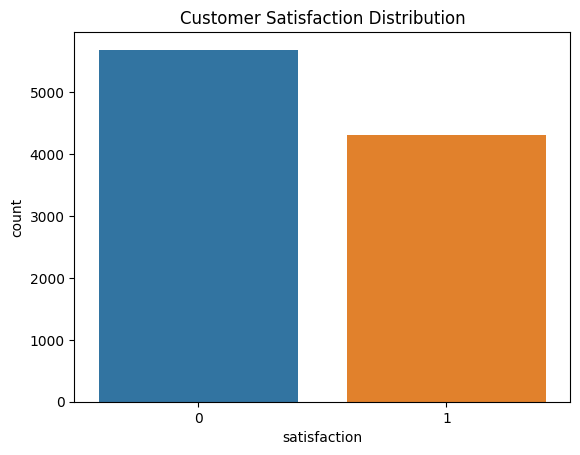

In [19]:
sns.countplot(x="satisfaction", data=data)
plt.title("Customer Satisfaction Distribution")
plt.show()

In [20]:
data["satisfaction"].value_counts()

satisfaction
0    5689
1    4311
Name: count, dtype: int64

In [21]:
#Mean Satisfaction by Gender
data.groupby('Gender')['satisfaction'].mean()

Gender
Female    0.424432
Male      0.438062
Name: satisfaction, dtype: float64

In [22]:
#Mean Satisfaction by Age
data.groupby('Age')['satisfaction'].mean().head()

Age
7     0.071429
8     0.081967
9     0.194030
10    0.137255
11    0.115942
Name: satisfaction, dtype: float64

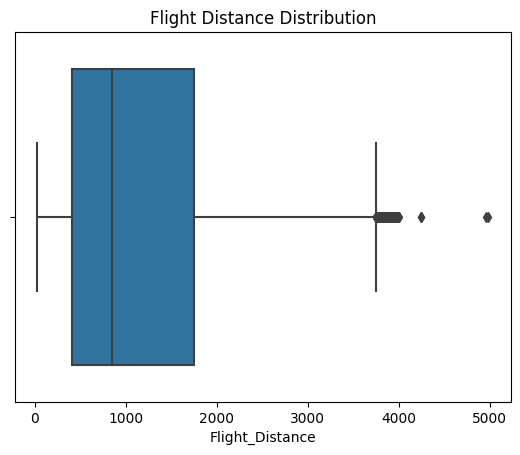

In [23]:
sns.boxplot(x=data['Flight_Distance'])
plt.title("Flight Distance Distribution")
plt.show()

## ❌ Handling Missing Values

Missing values are checked and removed to ensure clean data.


In [25]:
data.isnull().sum()

Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26
satisfaction                          0
dtype: int64

In [26]:
data.dropna(inplace=True)

In [27]:
data.isnull().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

## 🔢 Encoding Categorical Features

Machine learning models require numerical input.
Categorical columns are encoded using Label Encoding.


In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_columns = [
    'Gender',
    'Customer_Type',
    'Type_of_Travel',
    'Class'
]

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

## 🧩 Feature and Target Separation


In [31]:
#Split X and y
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

## ⚖️ Feature Scaling

Scaling is applied to standardize feature ranges.


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## 🔀 Train-Test Split

The dataset is split into training and testing sets.


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## 🌳 Decision Tree Model Training

A Decision Tree Classifier is trained using the Gini Index.


In [37]:
#Train Model
from sklearn.tree import DecisionTreeClassifier

data_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    random_state=42
)

data_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

## 📈 Model Evaluation

Multiple evaluation metrics are used to assess model performance.


In [39]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [69]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Accuracy: 0.9293233082706767
Precision: 0.937046004842615
Recall: 0.8968713789107764
F1 Score: 0.9165186500888101

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1132
           1       0.94      0.90      0.92       863

    accuracy                           0.93      1995
   macro avg       0.93      0.93      0.93      1995
weighted avg       0.93      0.93      0.93      1995

[[1080   52]
 [  89  774]]


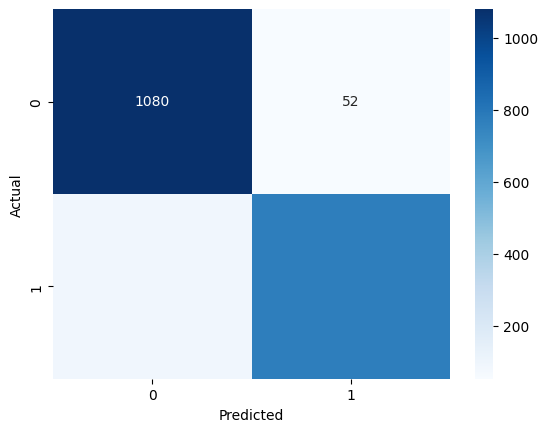

In [71]:
evaluate_model(data_model, X_test, y_test)

## 🏁 Conclusion

This project demonstrates a complete machine learning pipeline using a
Decision Tree classifier to predict airline customer satisfaction.

The model provides interpretable results and highlights key service-related
features influencing customer satisfaction.


## 🚀 Future Enhancements

- Hyperparameter tuning
- Random Forest / XGBoost
- Flask or Streamlit deployment
- Live customer satisfaction prediction
